# Dynamic Mode Decomposition (DMD) and Multi-Resolution DMD (mrDMD)
Decoding hand movements from ECoG recordings

## Installation
```Bash
git clone https://github.com/kdmarrett/dmd
sudo apt-get install python3-pip
sudo pip3 install numpy matplotlib cvxpy pytest sklearn
```
## Usage

In your project, load the required modules:

In [1]:
%matplotlib inline
from mrDMD import mrDMD
from DMD import DMD
from helper_functions import *

### Getting started with spectral DMD analysis

Start with a signal composed of a sum of sinusoids in 1-dimension

Freqs: 
[ 0  4  8 12 16 20 24 28 32 36]


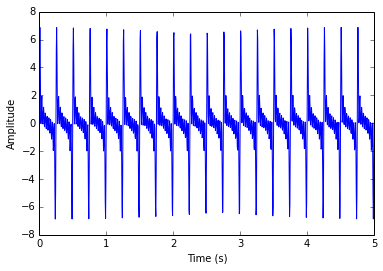

In [2]:
dt = 1/200
N = 1000
t = np.linspace(0, 5, N)
amp = 1
freq_max = 40
freqs = np.arange(freq_max)
freqs = freqs[::4]
print('Freqs: ')
print(freqs)

X = build_signal(freqs, t)
plt.figure()
plt.plot(t, X[0,:])
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

Comparisons to FFT when frequency below Nyquist

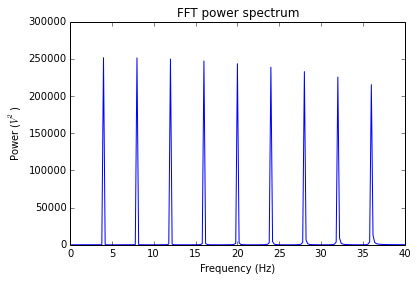

In [3]:
freq, P = fft_plot(X, dt, freq_max)

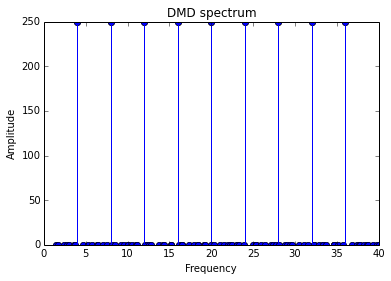

In [4]:
stack_factor = 2*len(freqs)
kwargs = {'dt':dt, 
    'scale_modes':True}
dmd = DMD(**kwargs)
dmd.fit(X)
f, P = dmd.spectrum(sort='frequencies')

idx = in_range(f, (1,freq_max))
plt.figure()
plt.stem([f[i] for i in idx], [P[i] for i in idx])
plt.title('DMD spectrum')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.show()
plt.close()

In this example, we see that DMD can be used for spectral analysis of our simple sinusoid signal. The frequencies originally summated to the
signal are successfully extracted. Whereas FFT returns in units of power ($ V^2 $),
the DMD algorithm estimates a relative amplitude of the power from the modes.


### DMD spatio-temporal analysis

The main advantage of DMD is the ability to extract coupled spatio-temporal modes. Taking a more complex example we now have a multidimensional signal with varying dynamics across
those dimensions:

/usr/lib/python3/dist-packages/matplotlib/collections.py:549: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


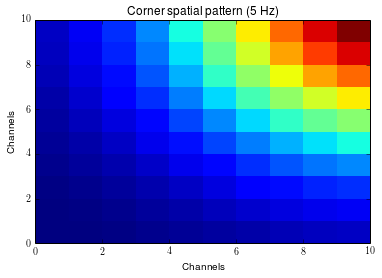

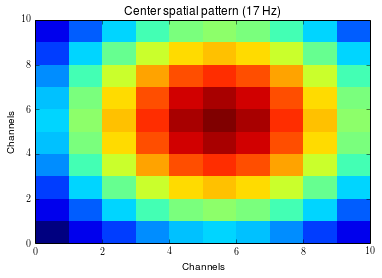

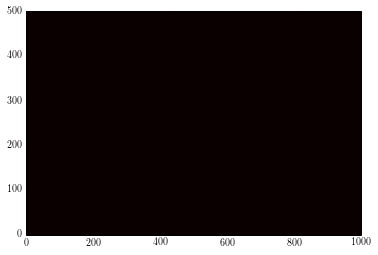

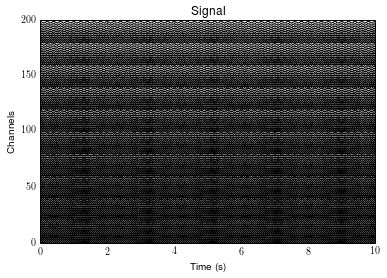

In [6]:
#Define sig characteristics
dt = .01
seconds = 10
N = int(seconds * (1 / dt))
t = np.linspace(0, seconds, N)
r = 1
amp = 1
size = 10
freq_list = [5, 17]

noise_amp=.01
x, ideal_spec, spatial_list = build_spatial(size, t, freq_list,
        noise_amp=noise_amp, plot=True)

### Extracting transient spatio-temporal signals with mrDMD

## Testing

Pytest is used for unit testing via running

```Bash
$$$ pytest
```